<a href="https://colab.research.google.com/github/SamuelRodrigues1224/Projetos-de-ciencia-de-dados/blob/main/NLP_D%26D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install flashtext

In [ ]:
import pandas as pd
from flashtext import KeywordProcessor

In [ ]:
# Carga de dados
df = pd.read_csv("/content/SkillDB - Skills.csv")

df

,Skill,Description
0,ACROBATICS,Freeing yourself from grapples and the like
1,ACROBATICS,Squeezing through tight spaces without losing ...
2,ACROBATICS,Balancing on thin/fragile surfaces without fal...
3,ACROBATICS,Landing on your feet after a fall
4,ACROBATICS,"Ignoring falling damage, such as falling from ..."
...,...,...
230,SURVIVAL,Finding Parts for a Booby Trap
231,SURVIVAL,Harvest Poisonmaking Materials
232,SURVIVAL,"Follow tracks, hunt wild game, guide your grou..."
233,WISDOM,Get a gut feeling about what course of action ...


In [ ]:
#Pré-processamento de texto
"""kp = KeywordProcessor()
stopwords_ninjas = ['of', 'a', 'the']
nltk.download('stopwords')
stopwords_nltk = list(stopwords.words('english'))
stopwords_ninjas.extend(stopwords_nltk)
for i in stopwords_ninjas:
    kp.add_keyword(i, ' ')

df['Texto_tratado'] = df.Description.apply(kp.replace_keywords)
df """


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Skill,Description,Texto_tratado
0,ACROBATICS,Freeing yourself from grapples and the like,Freeing grapples like
1,ACROBATICS,Squeezing through tight spaces without losing ...,Squeezing tight spaces without losing movement
2,ACROBATICS,Balancing on thin/fragile surfaces without fal...,Balancing thin/fragile surfaces without falling
3,ACROBATICS,Landing on your feet after a fall,Landing feet fall
4,ACROBATICS,"Ignoring falling damage, such as falling from ...","Ignoring falling damage, falling cart"
...,...,...,...
230,SURVIVAL,Finding Parts for a Booby Trap,Finding Parts Booby Trap
231,SURVIVAL,Harvest Poisonmaking Materials,Harvest Poisonmaking Materials
232,SURVIVAL,"Follow tracks, hunt wild game, guide your grou...","Follow tracks, hunt wild game, guide group ..."
233,WISDOM,Get a gut feeling about what course of action ...,Get gut feeling course action follow


In [ ]:
df.Skill.value_counts()

Skill
ATHLETICS          23
SURVIVAL           21
ANIMAL HANDLING    18
ARCANA             14
ACROBATICS         13
MEDICINE           13
DECEPTION          13
INSIGHT            12
HISTORY            11
PERSUASION         11
PERCEPTION         10
SLEIGHT OF HAND    10
STEALTH            10
INVESTIGATION       9
NATURE              9
PERFORMANCE         8
INTIMIDATION        7
RELIGION            7
INTELIGENCE         6
STRENGHT            6
CHARISMA            2
WISDOM              2
Name: count, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [ ]:
#Data leveler (reamostragem)
df_amostra = pd.DataFrame()
maximo = df.Skill.value_counts().max()
for Skill in df.Skill.unique():
    df_amostra = pd.concat([df_amostra, df[df.Skill == Skill].sample(maximo, random_state=42, replace = True)])
df_amostra.Skill.value_counts()

Skill
ACROBATICS         23
ANIMAL HANDLING    23
SURVIVAL           23
STRENGHT           23
STEALTH            23
SLEIGHT OF HAND    23
RELIGION           23
PERSUASION         23
PERFORMANCE        23
PERCEPTION         23
NATURE             23
MEDICINE           23
INVESTIGATION      23
INTIMIDATION       23
INTELIGENCE        23
INSIGHT            23
HISTORY            23
DECEPTION          23
CHARISMA           23
ATHLETICS          23
ARCANA             23
WISDOM             23
Name: count, dtype: int64

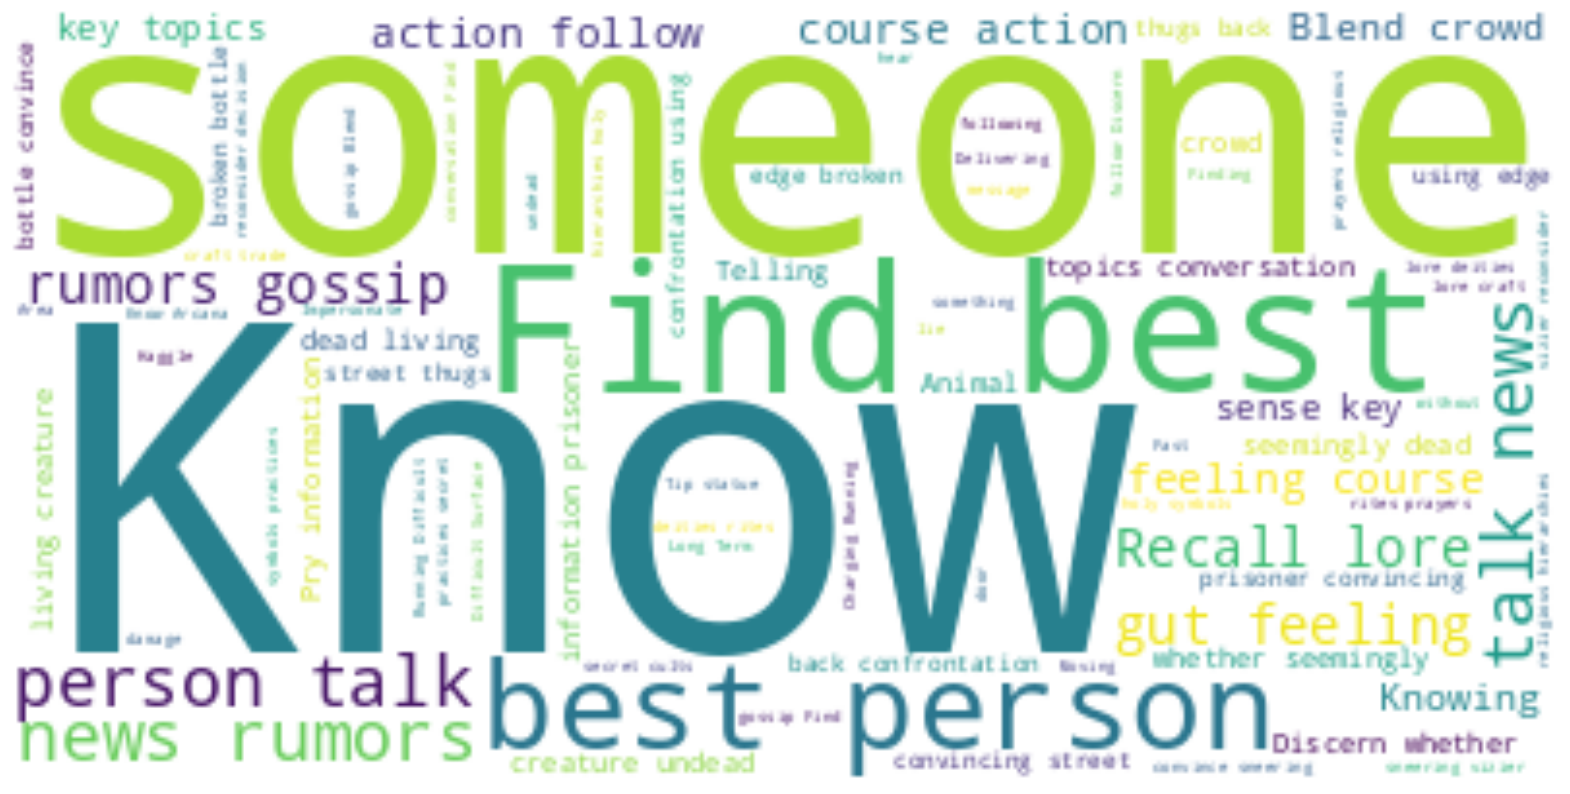

In [ ]:
#Nuvem de palavras (EDA de texto)
wordcloud = WordCloud(background_color='white').generate(df_amostra.Texto_tratado.str.cat(sep=' '))
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Vetorização do texto / bag of words
tfdf = TfidfVectorizer(ngram_range=(1, 3), max_df=0.8)
x = tfdf.fit_transform(df_amostra.Texto_tratado)

x

<506x1608 sparse matrix of type '<class 'numpy.float64'>'
	with 5116 stored elements in Compressed Sparse Row format>

In [ ]:
#Treinamento do modelo
xtrain, xtest, ytrain, ytest = train_test_split(x, df_amostra.Skill, test_size=0.5, random_state=42)
rfc = RandomForestClassifier(random_state = 42)
model = rfc.fit(xtrain, ytrain)


In [ ]:
#Teste do modelo
pred = model.predict(xtest)
predAll = model.predict(x)
print(classification_report(ytest, pred))

                 precision    recall  f1-score   support

     ACROBATICS       0.92      0.80      0.86        15
ANIMAL HANDLING       1.00      0.86      0.92        14
         ARCANA       0.91      1.00      0.95        10
      ATHLETICS       1.00      0.29      0.45        17
       CHARISMA       1.00      1.00      1.00        12
      DECEPTION       0.82      1.00      0.90         9
        HISTORY       1.00      0.77      0.87        13
        INSIGHT       1.00      0.58      0.74        12
    INTELIGENCE       1.00      1.00      1.00        10
   INTIMIDATION       0.85      1.00      0.92        11
  INVESTIGATION       0.80      0.80      0.80        10
       MEDICINE       1.00      0.80      0.89        10
         NATURE       0.89      1.00      0.94         8
     PERCEPTION       1.00      0.70      0.82        10
    PERFORMANCE       0.50      0.82      0.62        11
     PERSUASION       0.30      0.82      0.44        11
       RELIGION       0.80    

In [ ]:
print(confusion_matrix(ytest, pred))

[[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  2  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  5  0  0  0  0  0  0  0  0  0  0  1 10  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0 10  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  7  0  1  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [ ]:
#Matriz de confusão
fig = px.imshow(confusion_matrix(ytest, pred), x=model.classes_, y=model.classes_)
fig.show()

In [ ]:
def process_text(text):
  # Initialize a KeywordProcessor object
  kp = KeywordProcessor()

  # Download stopwords if necessary
  nltk.download('stopwords')

  # Get English stopwords
  stopwords_nltk = list(stopwords.words('english'))

  # Add stopwords to the KeywordProcessor
  for i in stopwords_nltk:
      kp.add_keyword(i, ' ')

  # Apply keyword replacement on the text
  processed_text = kp.replace_keywords(text)

  # Return the processed text
  return processed_text


text = input("Digite a instrução")
text = process_text(text)
x = tfdf.transform([text])
pred = model.predict(x)
print(pred)

df.loc[df.Skill == str(pred[0])]

Digite a instruçãoI tried to climb the castle wall
['PERSUASION']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Skill,Description,Texto_tratado
168,PERSUASION,Convincing someone to do what you want,Convincing someone want
169,PERSUASION,Debating,Debating
170,PERSUASION,Knowing how to behave in a given social setting,Knowing behave given social setting
171,PERSUASION,Flattering someone,Flattering someone
172,PERSUASION,Seducing someone,Seducing someone
173,PERSUASION,Change Attitude,Change Attitude
174,PERSUASION,Mediate,Mediate
175,PERSUASION,Haggle,Haggle
176,PERSUASION,Direct a Crowd,Direct Crowd
177,PERSUASION,Find Your Way around Court,Find Way around Court


In [ ]:
import random
text = df['Description'].sample(n=1).values[0]
print(text)

text = process_text(text)
x = tfdf.transform([text])
pred = model.predict(x)
print(pred)

df.loc[df.Skill == str(pred[0])]

Steal Object
['SLEIGHT OF HAND']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Skill,Description,Texto_tratado
186,SLEIGHT OF HAND,Stealing from people without being noticed,Stealing people without noticed
187,SLEIGHT OF HAND,Juggling,Juggling
188,SLEIGHT OF HAND,Putting something on someone without being not...,Putting something someone without noticed
189,SLEIGHT OF HAND,Picking a weapon from the air,Picking weapon air
190,SLEIGHT OF HAND,Concealing belongings in yourself,Concealing belongings
191,SLEIGHT OF HAND,Performing gestures or messages without being ...,Performing gestures messages without noticed
192,SLEIGHT OF HAND,Palm Object,Palm Object
193,SLEIGHT OF HAND,Conceal Object,Conceal Object
194,SLEIGHT OF HAND,Steal Object,Steal Object
195,SLEIGHT OF HAND,Tie a Knot,Tie Knot


In [ ]:
def preprocessar_texto(Frase):
  kp = KeywordProcessor()
  stopwords_all = list(stopwords.words('english'))
  stopwords_ninjas = ['of', 'a', 'the']
  stopwords_all.extend(stopwords_ninjas)
  for word in stopwords_all:
    kp.add_keyword(word, ' ')

  NovaFrase = kp.replace_keywords(Frase)
  return NovaFrase

#df = preprocessar_texto(df, 'Description')
#df

def vetorizar_texto(Frase):
  x = tfdf.transform([Frase])
  return x

def classificar_texto(Frase):
  x = vetorizar_texto(Frase)
  pred = model.predict(x)
  return pred

In [ ]:
NovaFrase = preprocessar_texto("I tried to climb the castle wall")
vetorizar_texto(NovaFrase)

ValueError: Iterable over raw text documents expected, string object received.

In [ ]:
def teste(Frase):
  texto_preprocessado = preprocessar_texto(Frase)
  texto_vetorizado = vetorizar_texto(texto_preprocessado)
  return classificar_texto(texto_vetorizado)

teste("I tried to climb the castle wall")

ValueError: Iterable over raw text documents expected, string object received.